<a href="https://colab.research.google.com/github/SriRamK345/RetailSalses_Forecast/blob/main/Sales_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

### Loading datasets

In [237]:
df_store = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [238]:
df_sales = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/sales_data_set.csv")
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [239]:
df_feature = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [240]:
df_store.shape

(45, 3)

In [241]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [242]:
df_sales.shape

(421570, 5)

In [243]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [244]:
df_feature.shape

(8190, 12)

In [245]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Combining Datasets

In [246]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,False
1,1,A,151315,1,12/02/2010,46039.49,True
2,1,A,151315,1,19/02/2010,41595.55,False
3,1,A,151315,1,26/02/2010,19403.54,False
4,1,A,151315,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,False
421566,45,B,118221,98,05/10/2012,628.10,False
421567,45,B,118221,98,12/10/2012,1061.02,False
421568,45,B,118221,98,19/10/2012,760.01,False


In [247]:
merged_df.shape

(421570, 7)

In [248]:
merged_df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [249]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [250]:
# df.set_index('Date', inplace=True)
# df.head()

In [251]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (423325, 17)


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
 16  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(12), int64(1), object(3)
mem

In [253]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [254]:
df.duplicated().sum()

0

In [255]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

### Preparation for Exploratory Data Analysis(EDA)

In [256]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [257]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    393529
True      29796
Name: count, dtype: int64

In [258]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [259]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,1755
Temperature,0
Fuel_Price,0
MarkDown1,270892
MarkDown2,310793


In [260]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Store,45
Type,3
Size,40
Dept,81
Date,182
Weekly_Sales,359464
Temperature,4178
Fuel_Price,1011
MarkDown1,4023
MarkDown2,2715


In [261]:
# import missingno
# import matplotlib.pyplot as plt
# missingno.bar(df, color = "b")
# plt.show()

In [262]:
df["Dept"].value_counts()

Dept
1.0     6435
16.0    6435
92.0    6435
38.0    6435
40.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: count, Length: 81, dtype: int64

### Separating columns (Numeric or Categorical)

In [263]:
numeric_columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3",  "MarkDown4", "MarkDown5", "CPI", "Unemployment"]
category_columns = ["Store",  "Type", "Size","IsHoliday", "Dept"]

In [264]:
df[numeric_columns].describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,423325.000000,423325.000000,152433.000000,112532.000000,138658.000000,136466.000000,153187.000000,422740.000000,422740.000000
mean,15981.258123,60.067140,3.361933,7246.604247,3337.597289,1449.098932,3382.019834,4618.743783,171.218863,7.957296
std,22711.183519,18.452599,0.458038,8319.906707,9461.265420,9674.705234,6306.728468,6258.233496,39.167088,1.863433
min,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,2079.650000,46.670000,2.935000,2230.800000,42.000000,5.140000,500.910000,1863.720000,132.022667,6.891000
50%,7612.030000,62.070000,3.452000,5336.520000,194.670000,24.830000,1465.540000,3340.020000,182.350989,7.866000
75%,20205.852500,74.260000,3.738000,9210.900000,1943.200000,104.500000,3592.000000,5535.130000,212.512605,8.567000
max,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [265]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Store,0
Type,1755
Size,1755
Dept,1755
Date,0
Weekly_Sales,1755
Temperature,0
Fuel_Price,0
MarkDown1,270892
MarkDown2,310793


In [266]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales','CPI','Unemployment'], inplace=True)

In [267]:
df.shape

(421570, 16)

In [268]:
df.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [269]:

# holiday_true_data = df[df['Holiday'] == 1]


# holiday_false_data = df[df['Holiday'] == 0]

In [270]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425718148824632
Markdown2 = 0.7361102545247528
Markdown3 = 0.6748084541120098
Markdown4 = 0.6798467632896079
Markdown5 = 0.6407903788220224


In [271]:
def plot(df, column):
    # Setting the style for seaborn
    sns.set_style("whitegrid")

    plt.figure(figsize=(20, 5)) # Creating the figure with a specific size

    # Creating the first subplot for the box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}', fontsize=16,color ="red")
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Value', fontsize=14, color = 'darkblue')

    # Creating the second subplot for the distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, bins=50, kde = True)
    plt.title(f'Distribution Plot for {column}', fontsize=16, color = 'red')
    plt.xlabel(f'{column}', fontsize=14, color = 'darkblue')
    plt.ylabel('Frequency', fontsize=14, color = 'darkblue')

    # Adjusting the layout
    plt.tight_layout()

    # Displaying the plots
    plt.show()

In [272]:
# for i in numeric_columns:
#   plot(df, i)

df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315.0,1.0,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [273]:
# Reset the index of your DataFrame to ensure unique index values
#df = df.reset_index()
MarkDown = ['MarkDown1', 'MarkDown2', 'MarkDown3',  'MarkDown4', 'MarkDown5']
# for i in MarkDown:
#   plot(df, i)

In [274]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [275]:
# df.set_index("Date")
# df.head()

In [276]:
# # make Date feature into --> Day,Month,Year new features and drop Date column
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


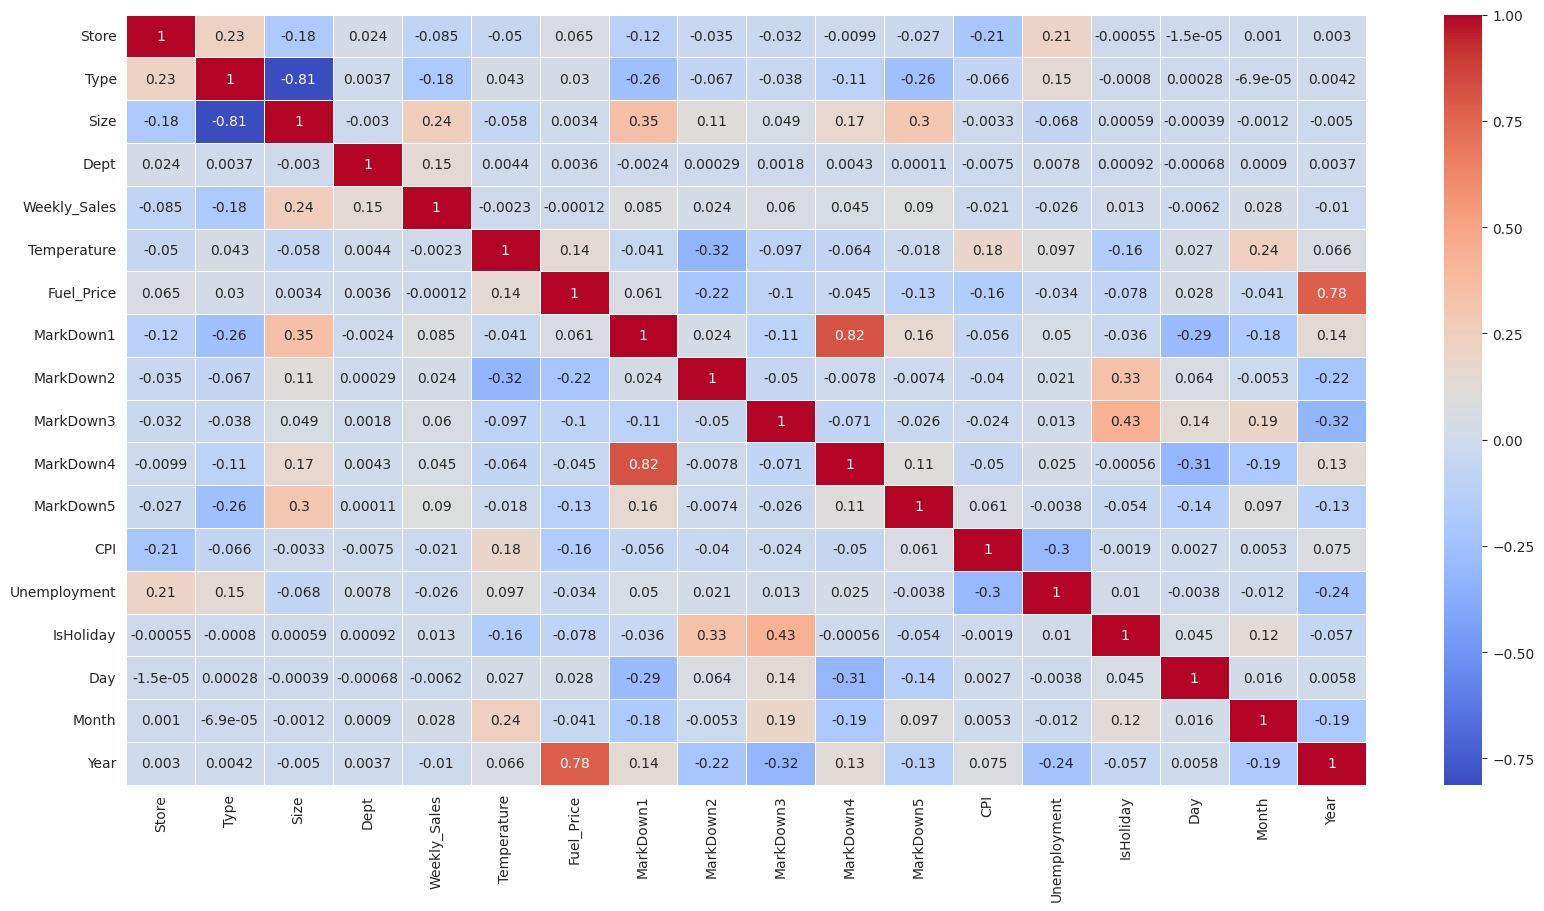

In [277]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [278]:
df2 = df.copy()
df2.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


In [279]:
df2.MarkDown1.fillna(df2.MarkDown1.median(), inplace=True)
df2.MarkDown2.fillna(df2.MarkDown2.median(), inplace=True)
df2.MarkDown3.fillna(df2.MarkDown3.median(), inplace=True)
df2.MarkDown4.fillna(df2.MarkDown4.median(), inplace=True)
df2.MarkDown5.fillna(df2.MarkDown5.median(), inplace=True)

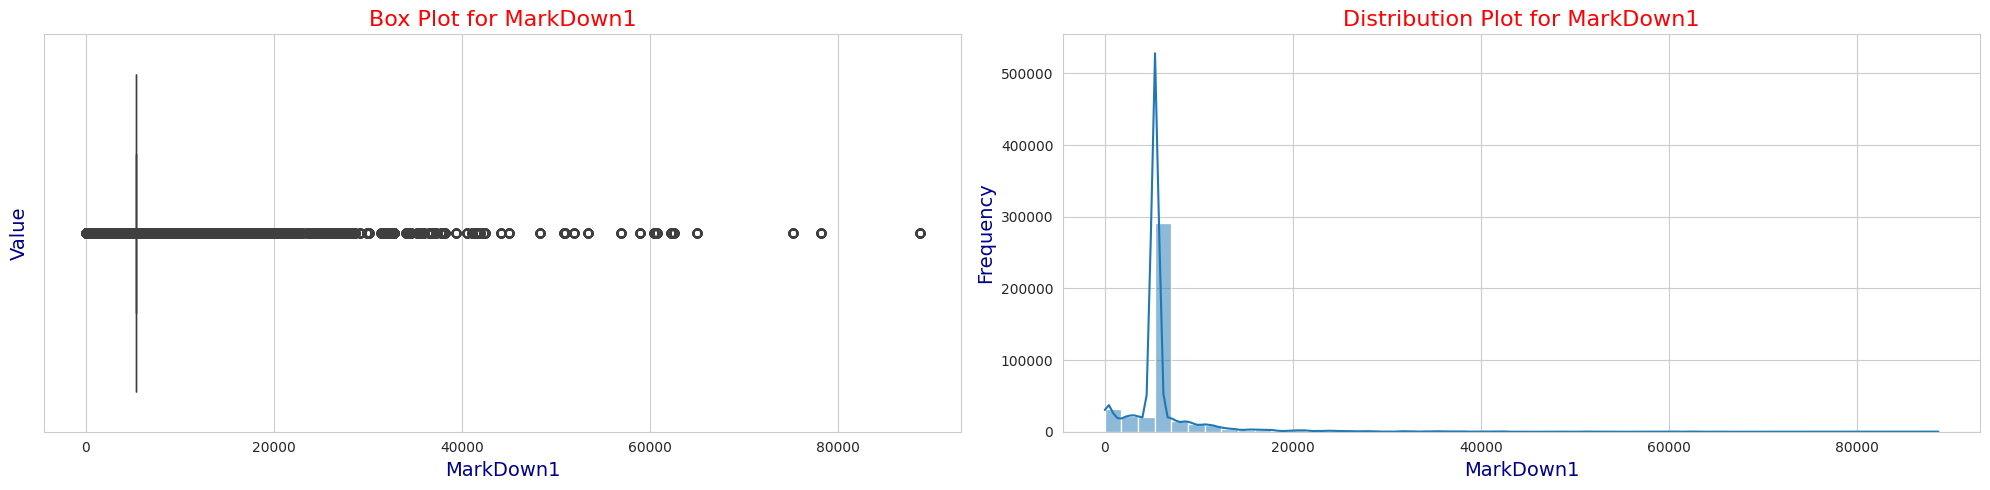

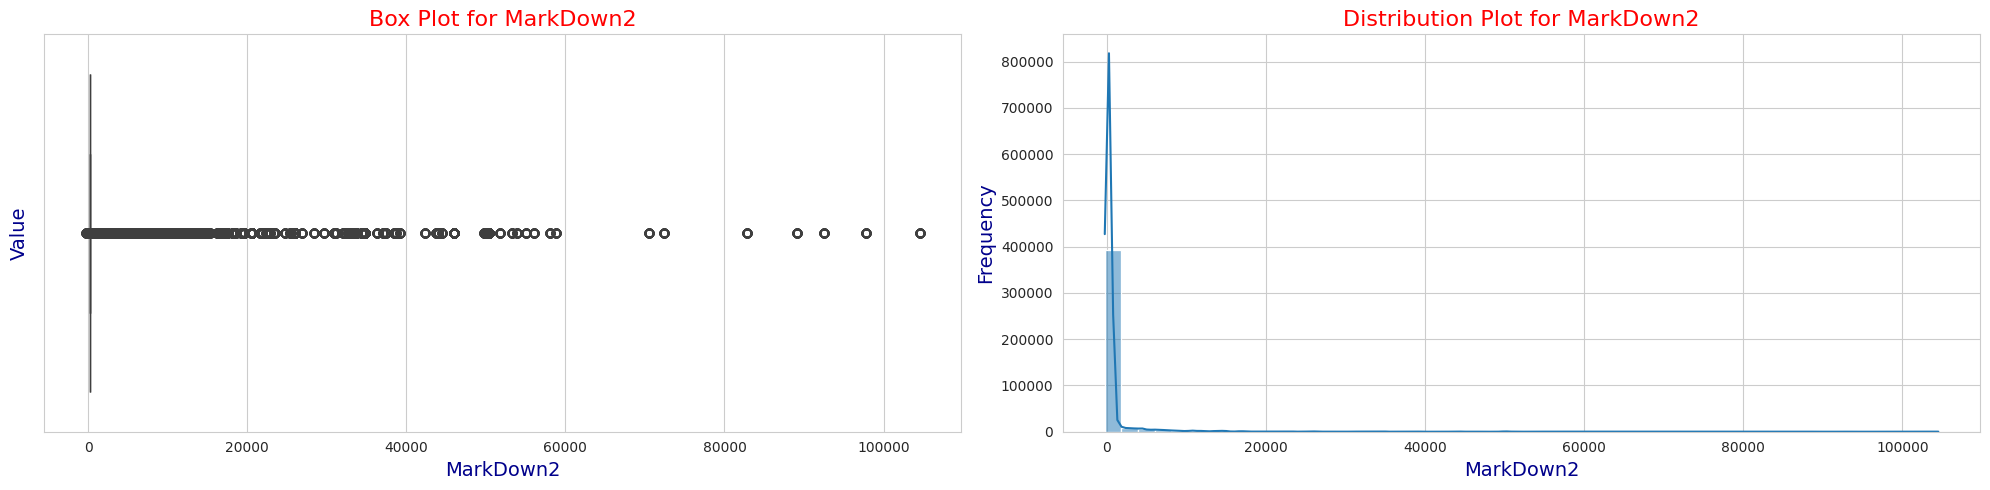

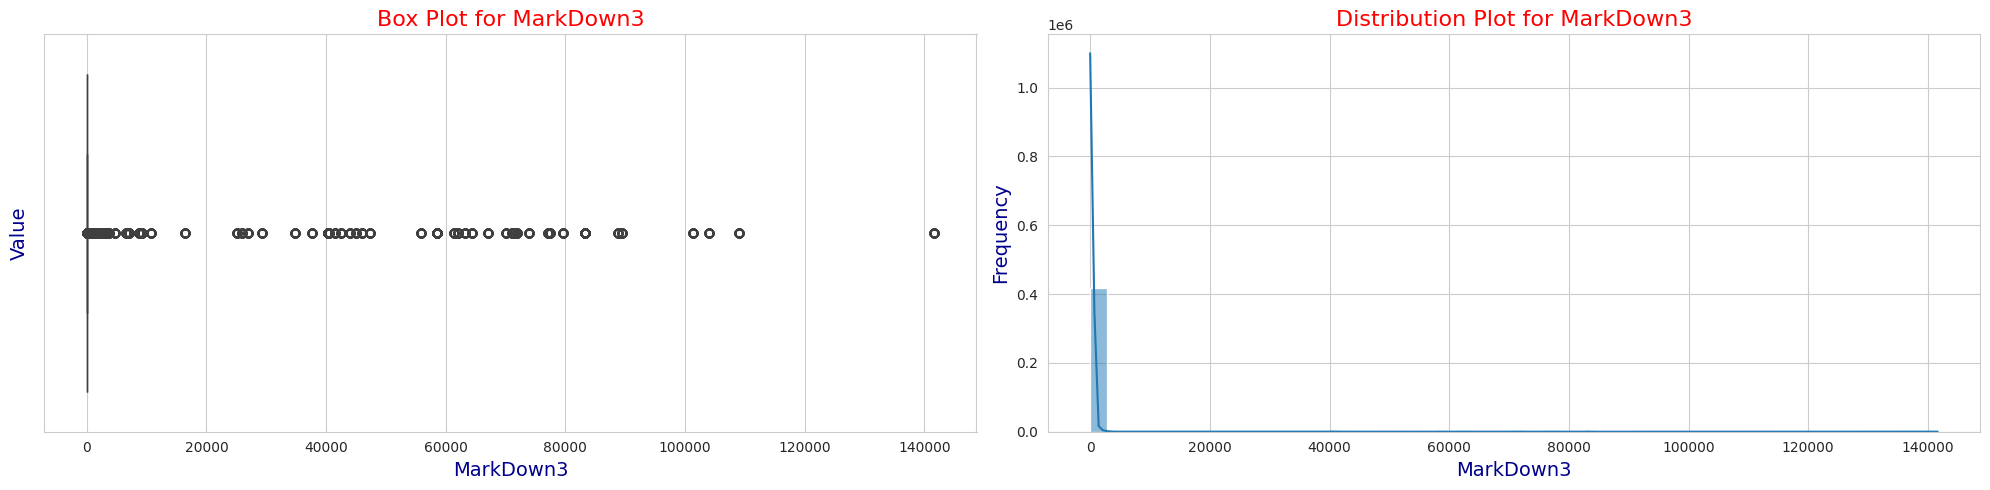

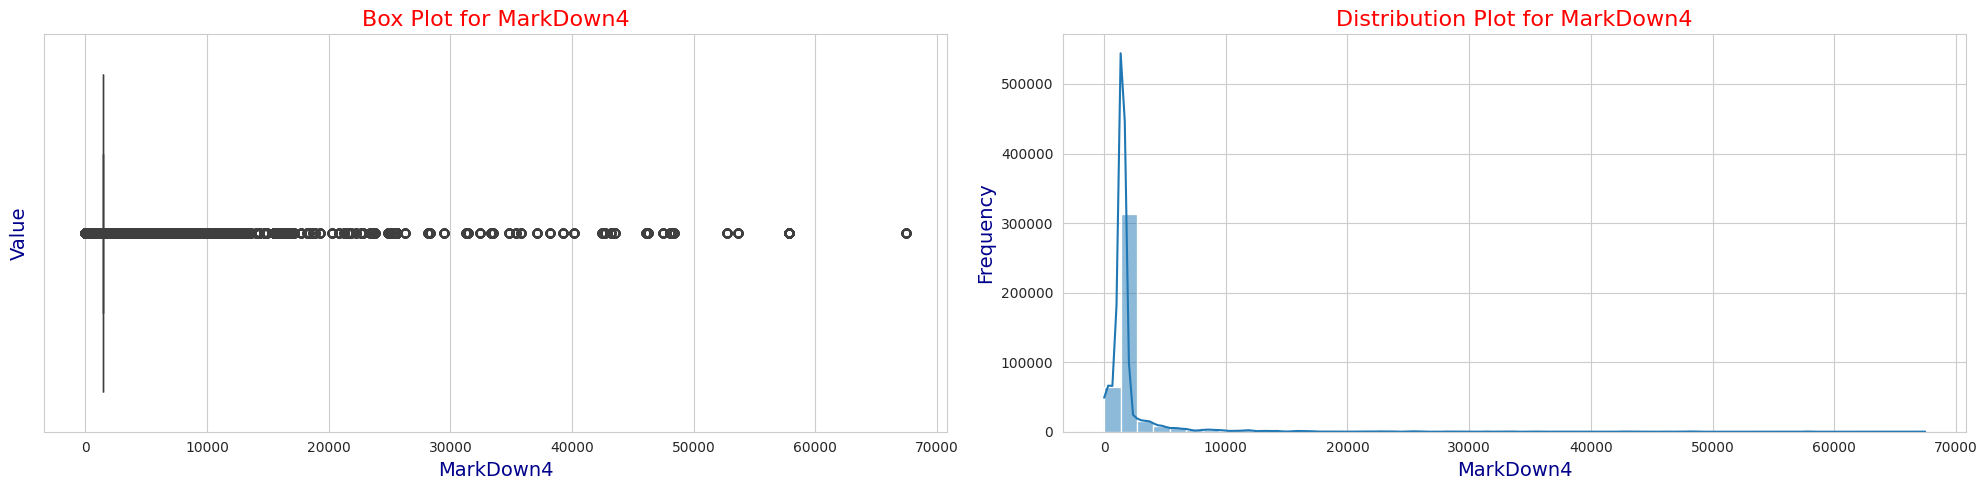

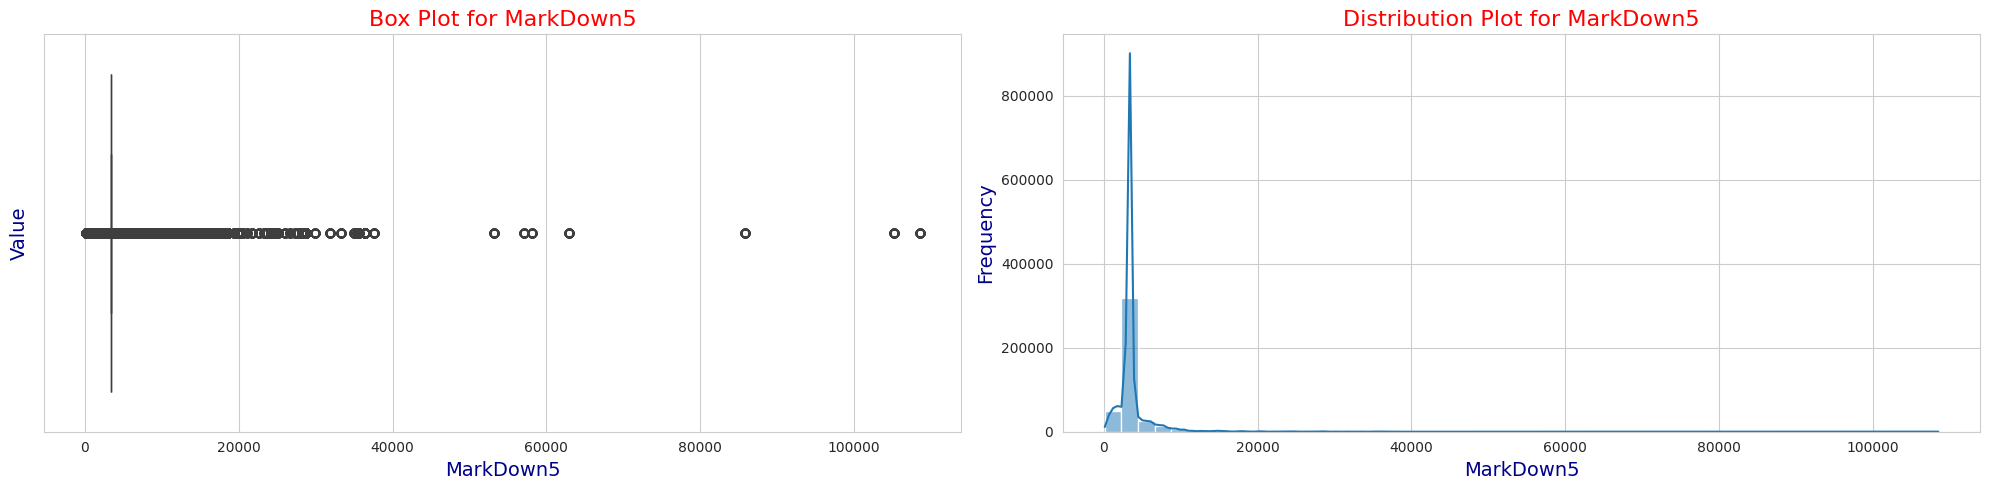

In [280]:
for i in MarkDown:
  plot(df2, i)

### Implementing ML techinique in DF

In [281]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)

Columns with null values: Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')


In [282]:
from sklearn.ensemble import RandomForestRegressor

# Features to use for prediction (all columns except the MarkDown columns)
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']

for target in MarkDown:
    # Split the data into training and prediction sets for the current MarkDown column
    train_df = df[df[target].notnull()]
    predict_df = df[df[target].isnull()]

    # Features and target
    X_train = train_df[features]
    y_train = train_df[target]
    X_predict = predict_df[features]

    # Initialize the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict missing values
    predicted_values = model.predict(X_predict)

    # Fill the missing values in the original DataFrame
    df.loc[df[target].isnull(), target] = predicted_values

df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010


In [283]:
# for i in numeric_columns:
#   plot(df, i)

In [284]:
category_columns

['Store', 'Type', 'Size', 'IsHoliday', 'Dept']

In [285]:
# # make Date feature into --> Day,Month,Year new features and drop Date column
# df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
# df['Day'] = df['Date'].dt.day
# df['Month'] = df['Date'].dt.month
# df['Year'] = df['Date'].dt.year
# df = df.drop(columns=['Date'])
# df.head()

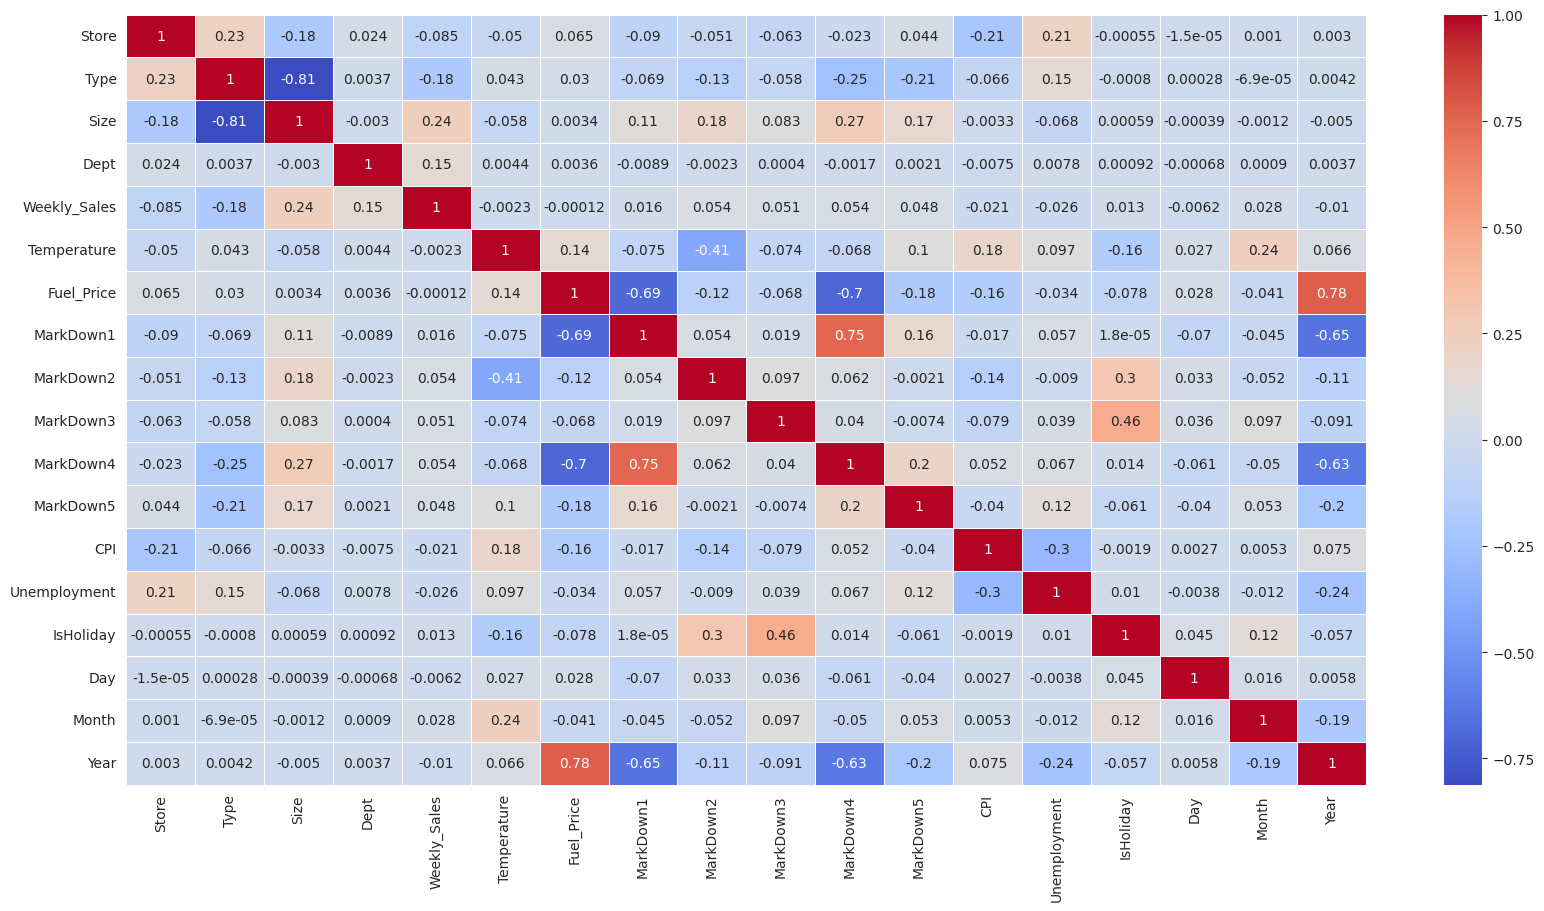

In [286]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [287]:
holiday_true_data = df[df['IsHoliday'] == 1]

holiday_false_data = df[df['IsHoliday'] == 0]

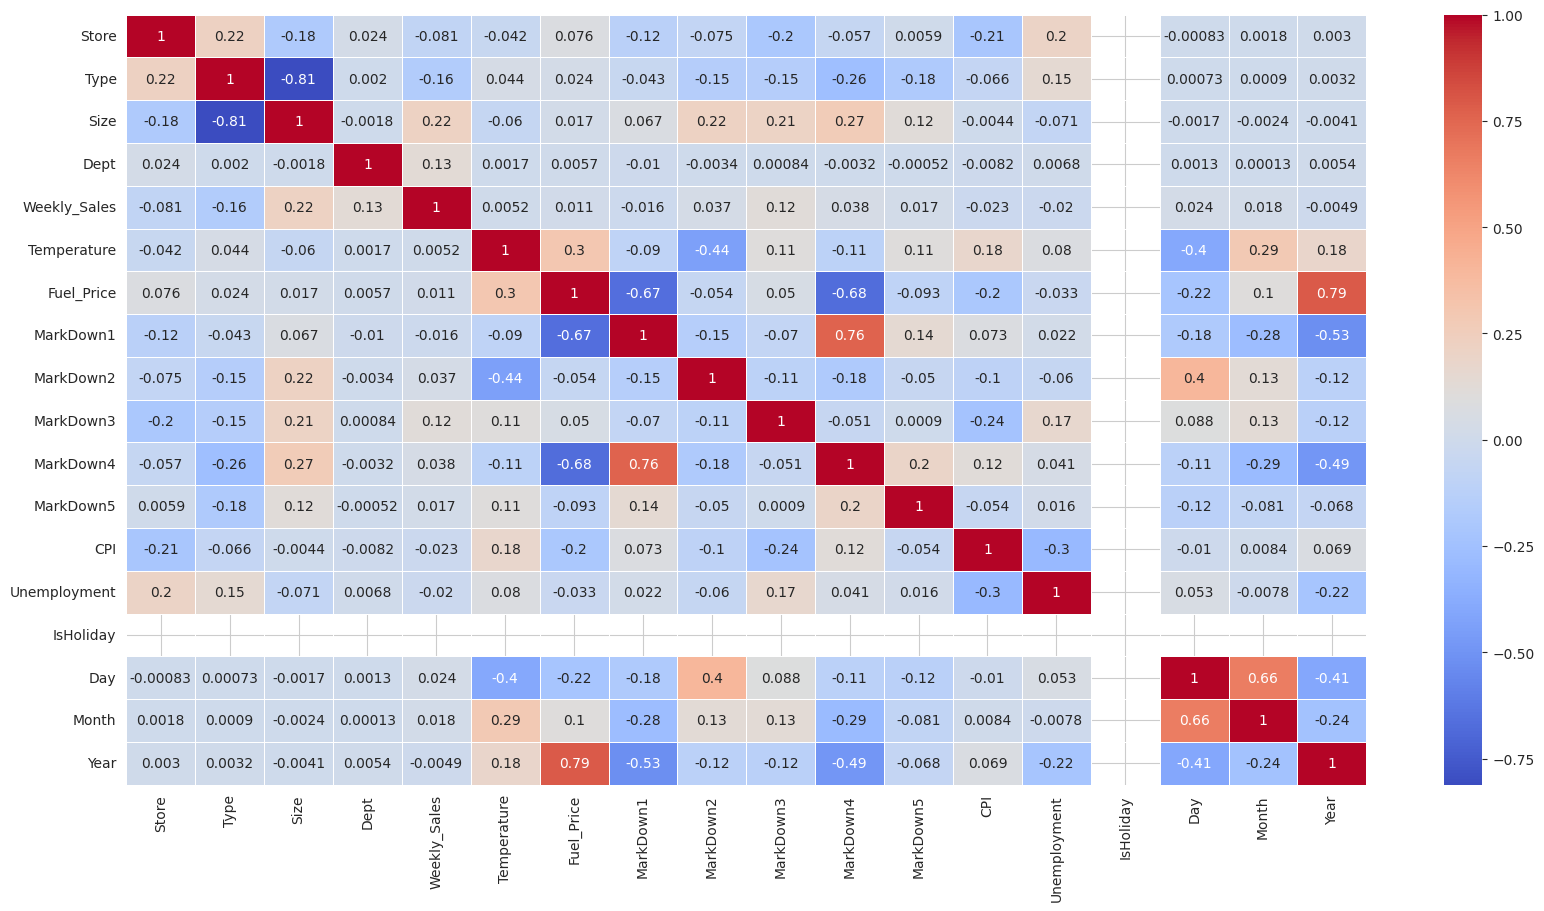

In [288]:
plt.figure(figsize=(20,10))
sns.heatmap(holiday_true_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

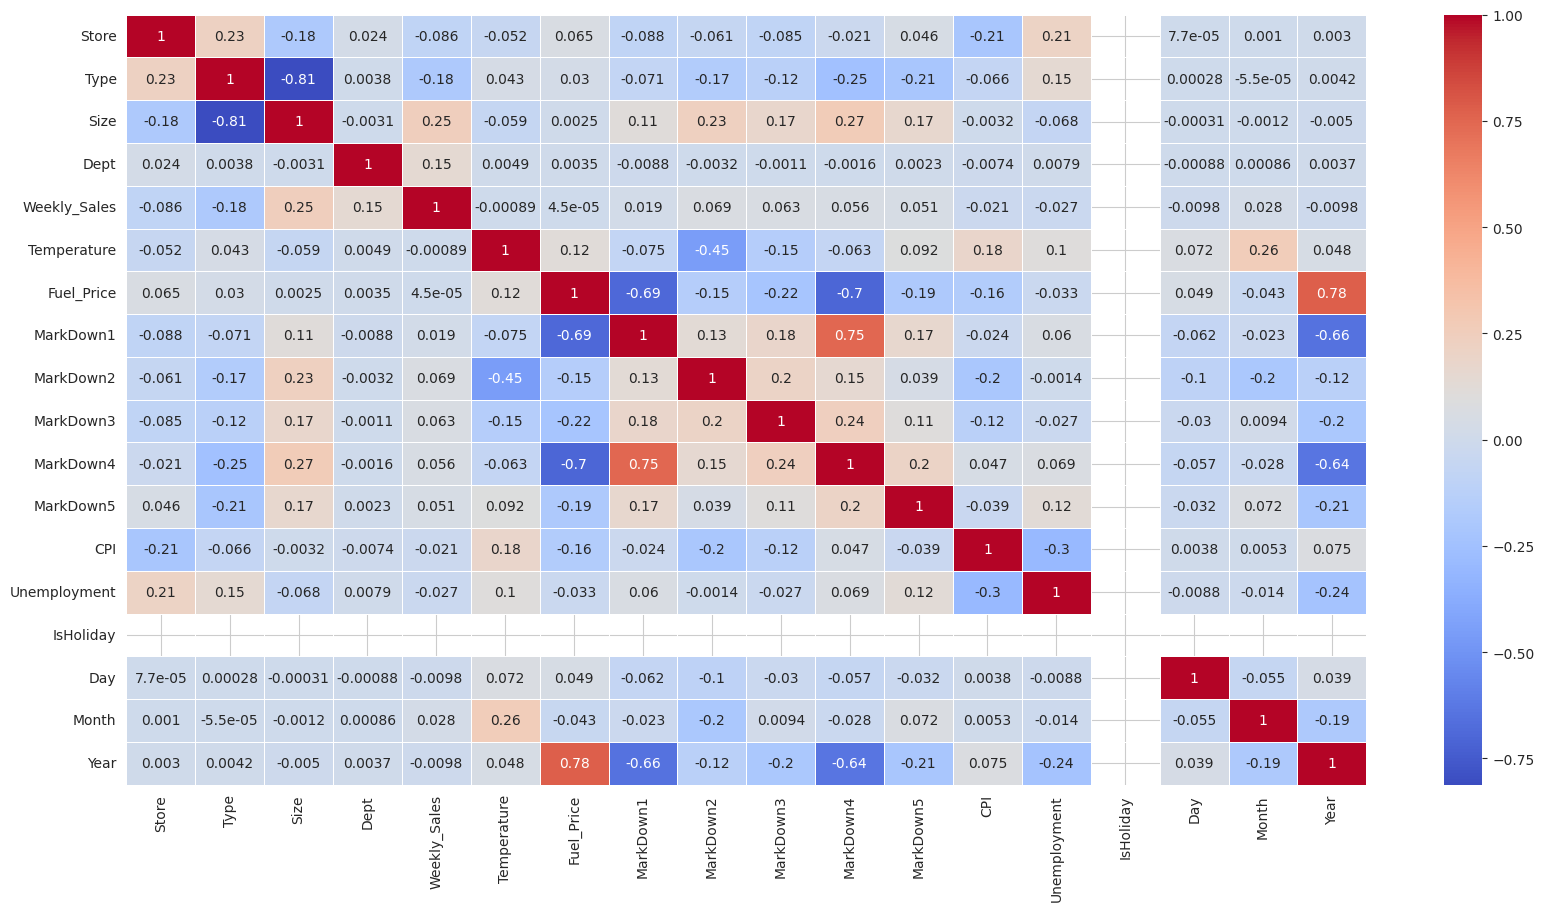

In [289]:
plt.figure(figsize=(20,10))
sns.heatmap(holiday_false_data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

([<matplotlib.patches.Wedge at 0x7ec10306ac50>,
 [Text(-1.0732375816130062, 0.24116611166054355, '0'),
  Text(1.0732376041926026, -0.2411660111767879, '1')],
 [Text(-0.5854023172434579, 0.13154515181484192, '93.0%'),
  Text(0.5854023295596014, -0.13154509700552067, '7.0%')])

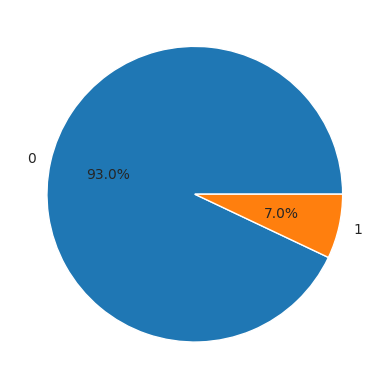

In [290]:
plt.pie(df.IsHoliday.value_counts(), labels=df.IsHoliday.value_counts().index, autopct='%1.1f%%')

In [291]:
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,151315.0,1.0,24924.50,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
1,1,1,151315.0,2.0,50605.27,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
2,1,1,151315.0,3.0,13740.12,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
3,1,1,151315.0,4.0,39954.04,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010
4,1,1,151315.0,5.0,32229.38,42.31,2.572,34912.1717,2718.7614,350.8541,37741.0103,11871.213,211.096358,8.106,0,5,2,2010


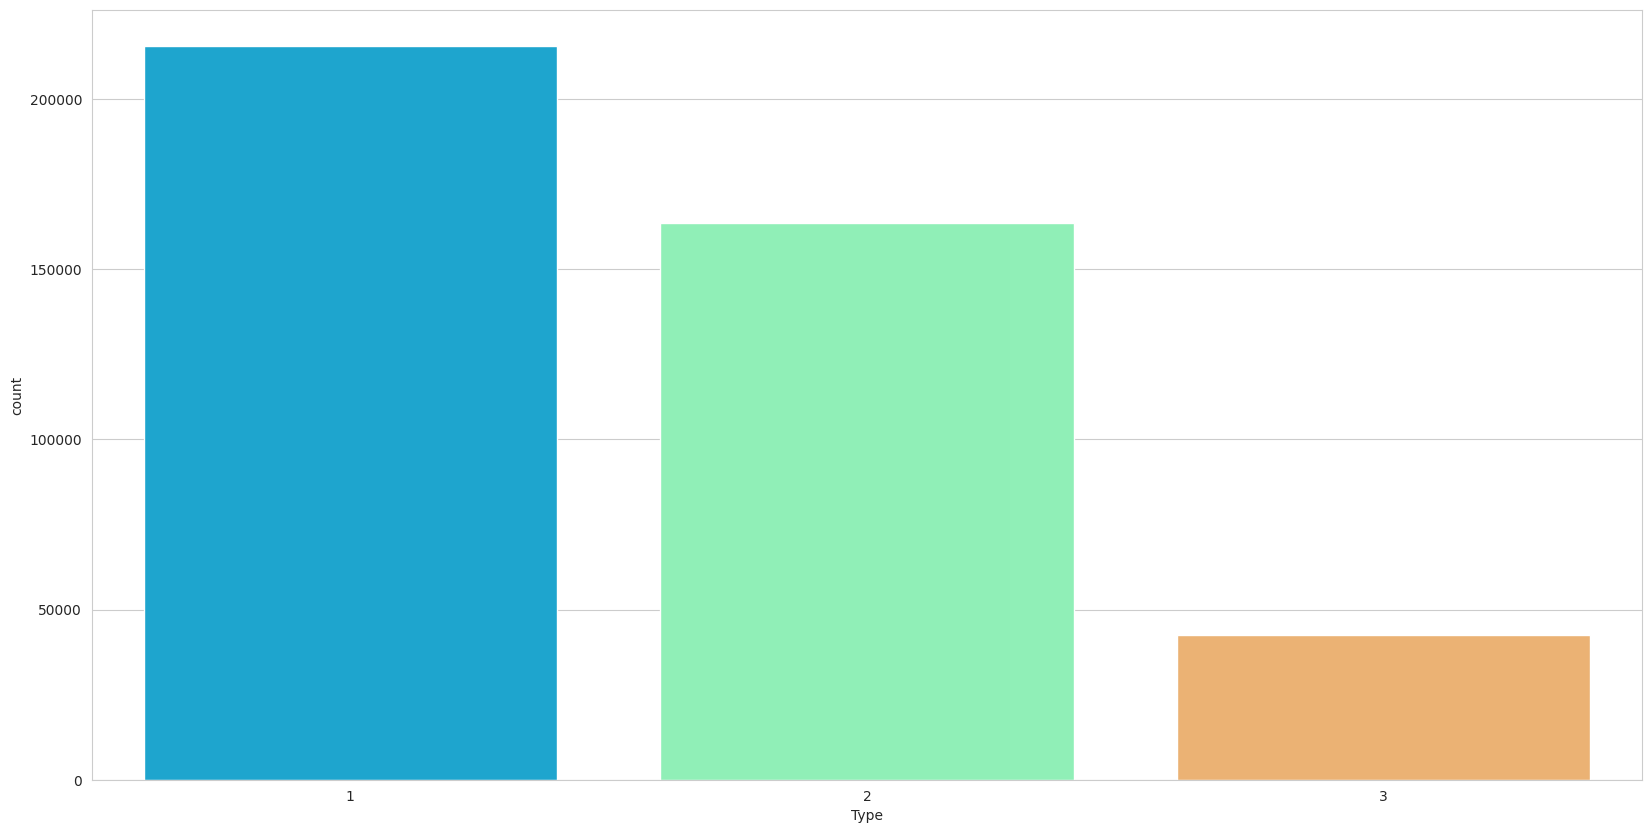

In [295]:
plt.figure(figsize = (20,10))
sns.countplot(x="Type", data = df, palette = "rainbow")
plt.show()

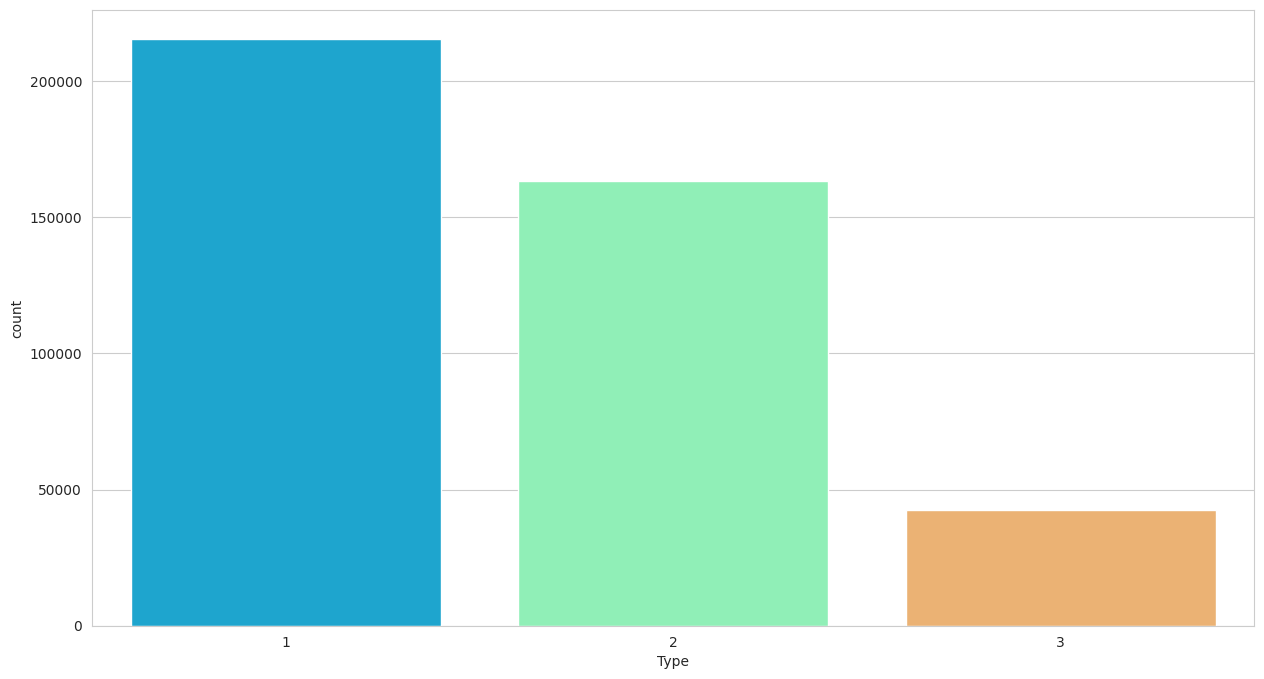

In [293]:
plt.figure(figsize = (15,8))
sns.countplot(x="Type", data = df, palette = "rainbow")
plt.show()

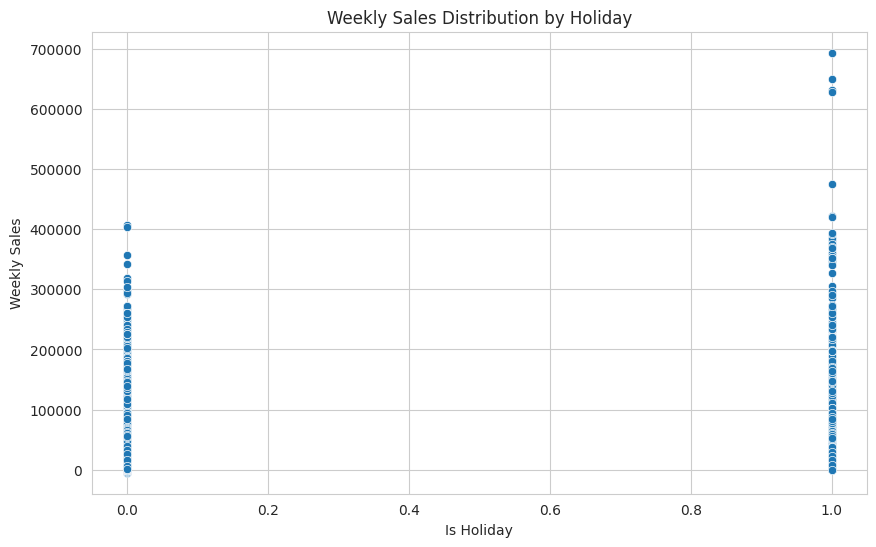

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.show()